In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Reading and displaying train data
train_data = pd.read_csv("/content/train_data.txt", sep=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(train_data.head())  # display the first 5 rows of train_data
print("Train Data Shape:", train_data.shape)  # display shape of train_data

# Reading and displaying test data
test_data = pd.read_csv("/content/test_data.txt", sep=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(test_data.head())  # display the first 5 rows of test_data
print("Test Data Shape:", test_data.shape)  # display shape of test_data

# Reading and displaying test solution data
test_solution_data = pd.read_csv("/content/test_data_solution.txt", sep=':::', engine='python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(test_solution_data.head())  # display the first 5 rows of test_solution_data
print("Test Solution Data Shape:", test_solution_data.shape)  # display shape of test_solution_data


   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
Train Data Shape: (54214, 4)
   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                               GENRE  DES

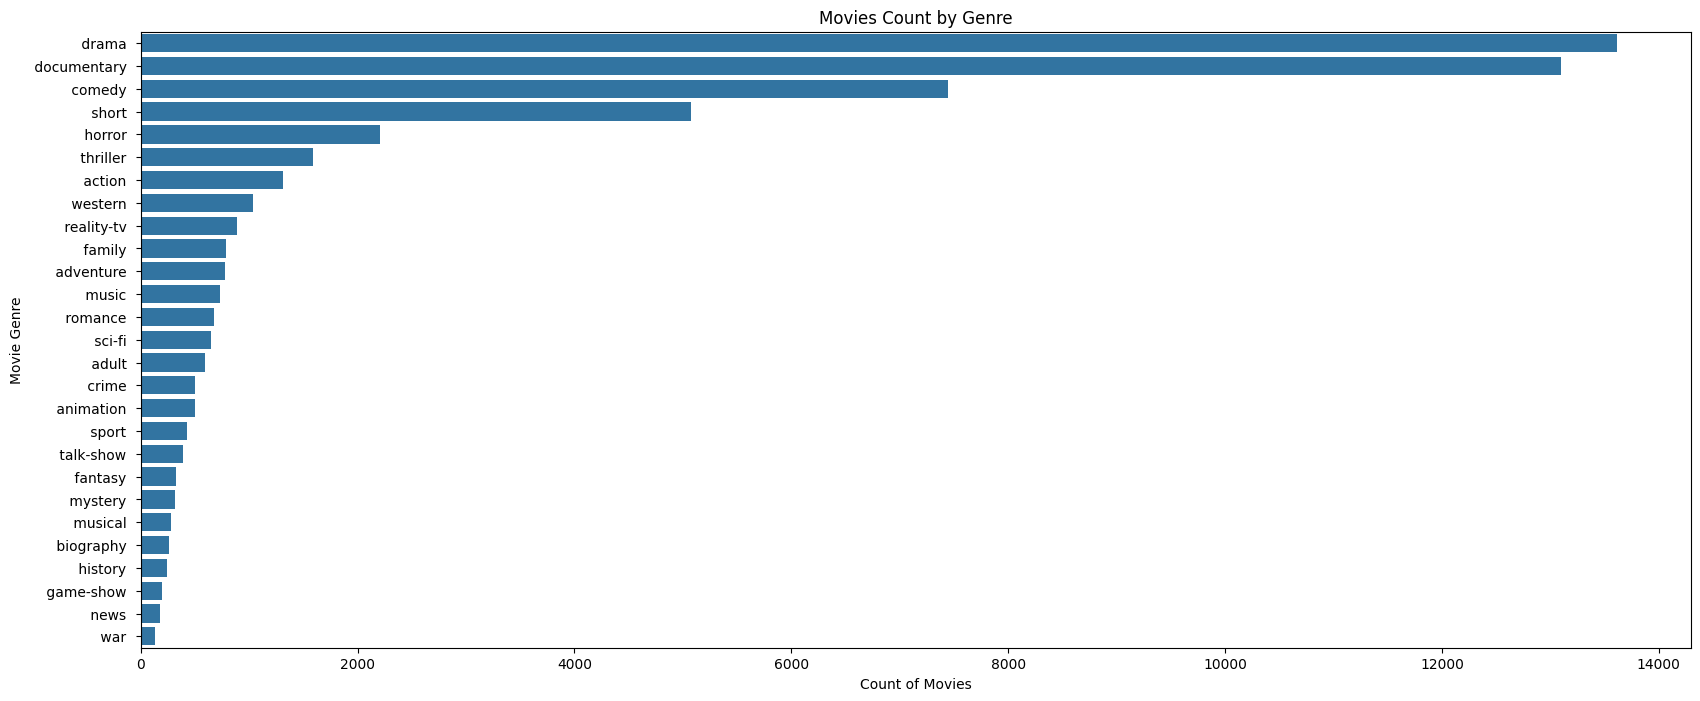

In [ ]:
# Plotting the count of movies per genre
plt.figure(figsize=(20,8))
genre_counts = train_data['GENRE'].value_counts().sort_values(ascending=False)
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Movies Count by Genre')
plt.xlabel('Count of Movies')
plt.ylabel('Movie Genre')
plt.show()


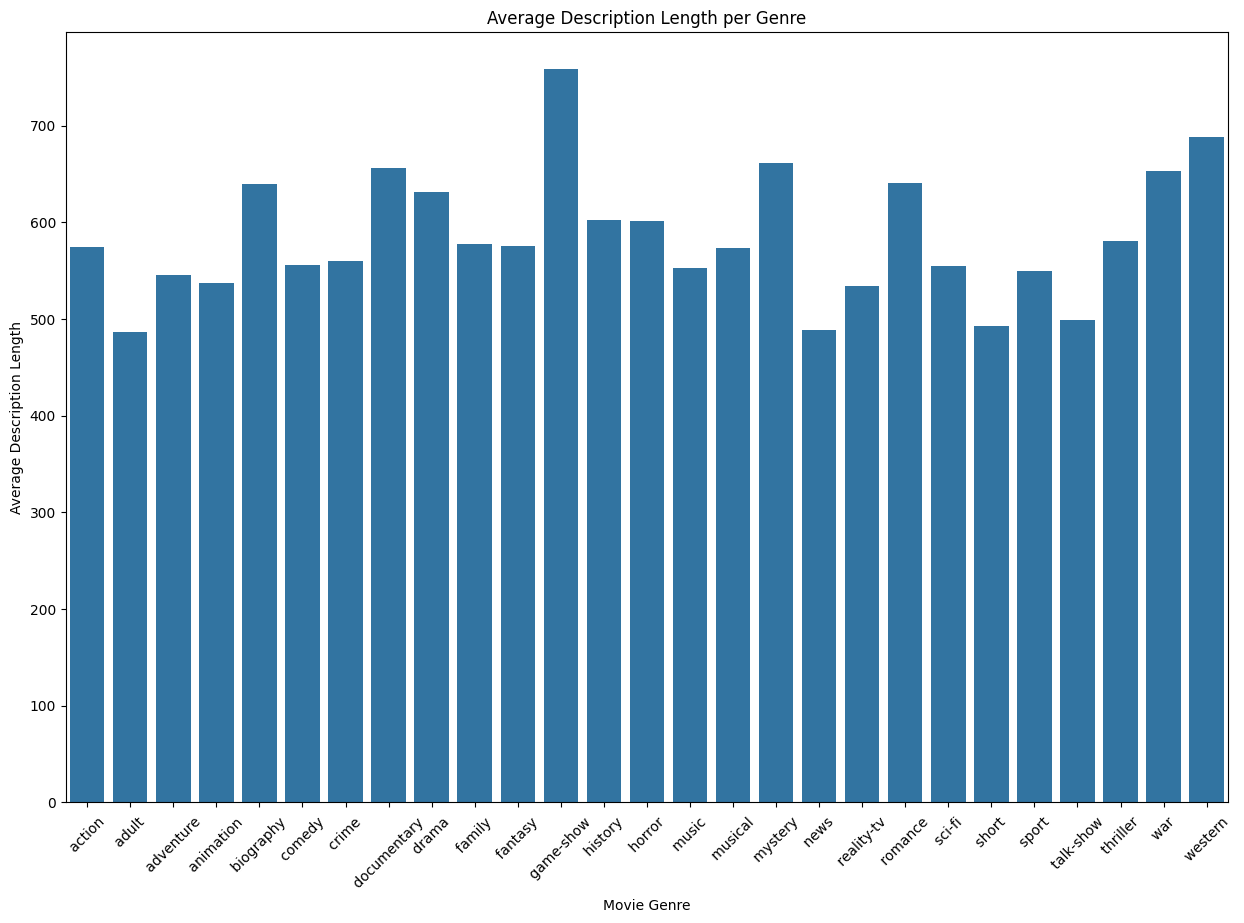

In [ ]:
# Creating a new column for description length
train_data['Desc_Len'] = train_data['DESCRIPTION'].str.len()

# Plotting the description length by genre
plt.figure(figsize=(15, 10))
avg_desc_len = train_data.groupby('GENRE')['Desc_Len'].mean().reset_index()
sns.barplot(x='GENRE', y='Desc_Len', data=avg_desc_len)
plt.title('Average Description Length per Genre')
plt.xticks(rotation=45)
plt.xlabel('Movie Genre')
plt.ylabel('Average Description Length')
plt.show()


<ipython-input-7-a256f1d7ffa2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cool')


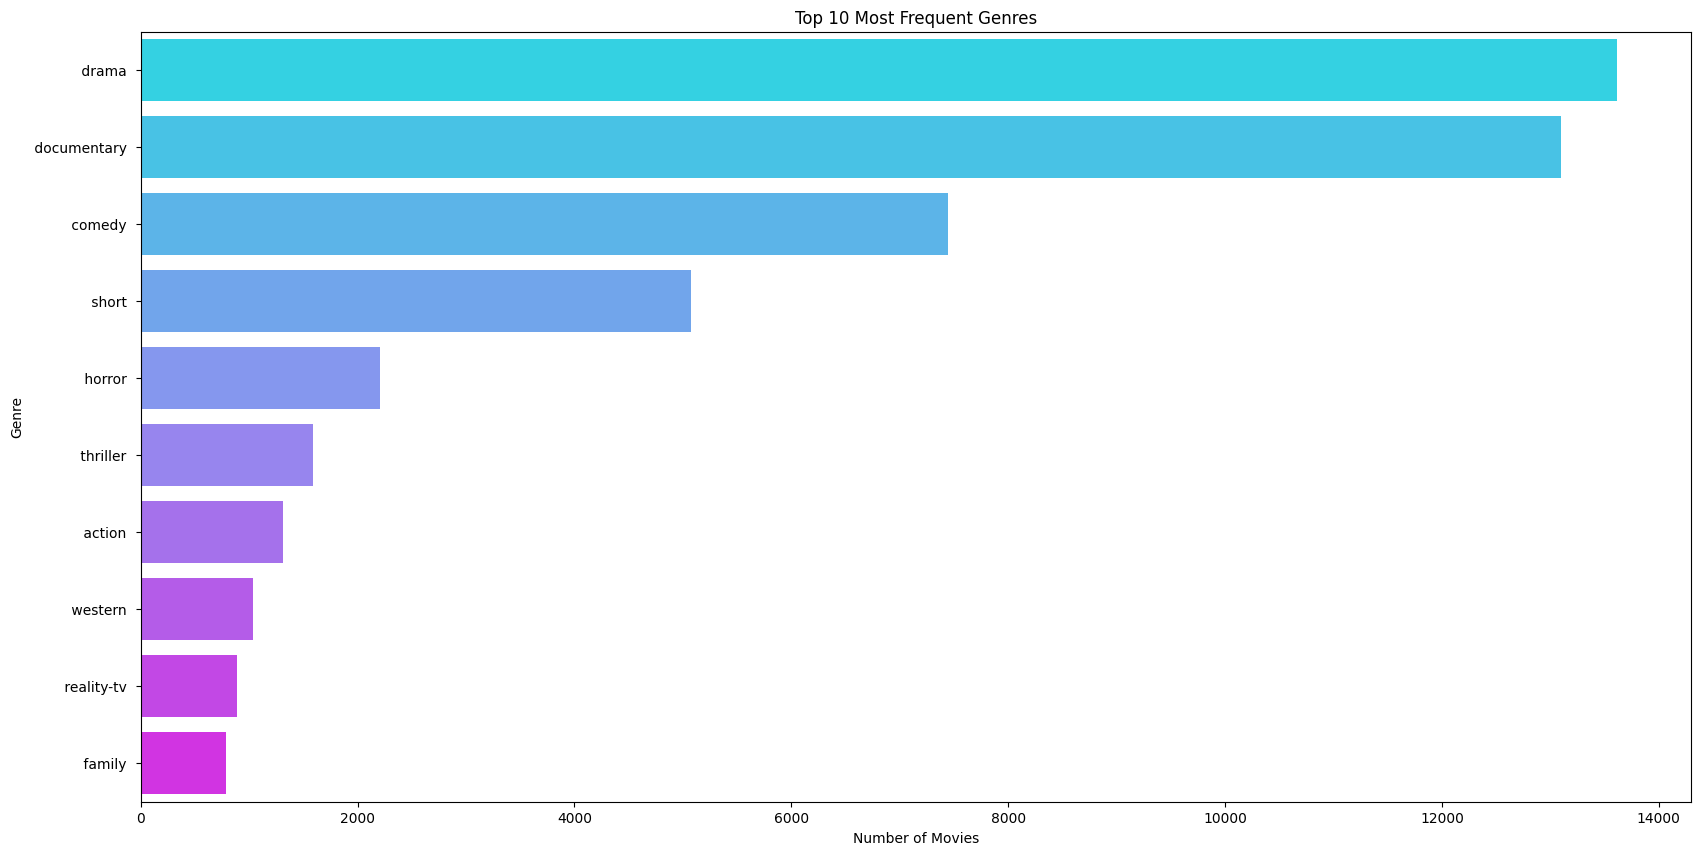

In [ ]:
# Getting the top 10 most frequent genres
top_10_genres = train_data['GENRE'].value_counts().nlargest(10)

# Plotting the top 10 genres
plt.figure(figsize=(20, 10))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cool')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


In [ ]:
# Handling missing values by replacing NaNs with an empty string
train_data['DESCRIPTION'].fillna(value="", inplace=True)
test_data['DESCRIPTION'].fillna(value="", inplace=True)

# Using TfidfVectorizer for transforming text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Encoding genre labels
genre_encoder = LabelEncoder()
y_train = genre_encoder.fit_transform(train_data['GENRE'])
y_test = genre_encoder.transform(test_solution_data['GENRE'])


<ipython-input-8-0cce0a83f0df>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_data['DESCRIPTION'].fillna(value="", inplace=True)


In [ ]:
# Splitting the training data into training and validation sets
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initializing and training the LinearSVC model
model = LinearSVC()
model.fit(X_train_sub, y_train_sub)

# Predicting on the validation set
y_pred_val = model.predict(X_val)

# Printing the validation accuracy and classification report
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Validation Accuracy: 0.5844323526699253
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.42      0.54       112
           2       0.45      0.21      0.28       139
           3       0.45      0.13      0.21       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.18      0.24       150
          10       0.19      0.04      0.07        74
          11       0.81      0.65      0.72        40
          12       0.00      0.00      0.00        45
          13       0.66      0.66      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
      

In [ ]:
# Making predictions on the test set
y_test_pred = model.predict(X_test)

# Printing the test accuracy and classification report
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Importing and training a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Making predictions on the test set using the Naive Bayes model
y_test_pred_nb = nb_model.predict(X_test)


In [ ]:
# Importing and training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [ ]:
# Predicting the labels for the test set using the Logistic Regression model
y_test_pred_lr = log_reg_model.predict(X_test)


In [ ]:
def classify_movie(description):
    # Transform the movie description to match the TF-IDF feature space
    description_vector = tfidf_vectorizer.transform([description])
    # Predict the genre using the trained classifier
    genre_prediction = model.predict(description_vector)
    # Convert the numeric genre to its original label
    genre_label = genre_encoder.inverse_transform(genre_prediction)
    return genre_label[0]

# Example movie descriptions
movie_descr1 = "A movie where police catches the criminal and shoots him."
print(classify_movie(movie_descr1))

movie_descr2 = "A movie where a person tries to marry a girl, but the girl refuses."
print(classify_movie(movie_descr2))


 drama 
 drama 
